# Liveneh Dataset Initial Investigation
We explore the liveneh SWE dataset in addition to temperature and precipitation datasets for the US West. We create basic metrics for evaluating SWE, define a snow drought mathematically, and begin to analyze variance.

In [1]:
# Import libraries
import os
import numpy as np
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # custom layouts
import pandas as pd
import datetime as dt
import matplotlib
from glob import glob

In [2]:
# Get list of files for import
rootdir = "/Users/julianschmitt/Downloads/NOAA/"
    
swe_files = glob(os.path.join(rootdir, "livneh_swe/*"))
prec_files = glob(os.path.join(rootdir, "livneh_prec/*"))
tmax_files = glob(os.path.join(rootdir, "livneh_tmax/*"))
tmin_files = glob(os.path.join(rootdir, "livneh_tmin/*"))

In [3]:
# open sample files - we try with xarray 
swe = xr.open_dataset(swe_files[0])

In [4]:
x = swe.lon[:]
y = swe.lat[:]
snw = swe.swe[:]

latbounds = [32 , 55]
lonbounds = [235 , 255]
# latitude lower and upper index
lat_lower = np.argmin(np.abs(y.data - latbounds[0]))
lat_upper = np.argmin(np.abs(y.data - latbounds[1])) 

# longitude lower and upper index
lon_lower = np.argmin(np.abs(x.data - lonbounds[0]))
lon_upper = np.argmin(np.abs(x.data - lonbounds[1]))

snow_cmap = matplotlib.cm.get_cmap('Blues_r')
snow_cmap.set_bad(color='gray')

rain_cmap = matplotlib.cm.get_cmap('Greens')
rain_cmap.set_bad(color='gray')

temp_cmap = matplotlib.cm.get_cmap('coolwarm')
temp_cmap.set_bad(color='gray')

std_cmap = matplotlib.cm.get_cmap('PiYG')
std_cmap.set_bad(color='gray')

<ipython-input-4-edddd894ad10>:16: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Blues_r").copy()
  snow_cmap.set_bad(color='gray')
<ipython-input-4-edddd894ad10>:19: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Greens").copy()
  rain_cmap.set_bad(color='gray')
<ipython-input-4-edddd894ad10>:22: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To 

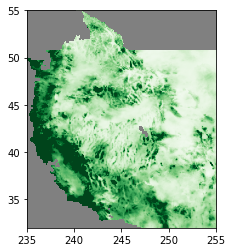

In [7]:
p_test = xr.open_dataset(f'/Users/julianschmitt/Downloads/NOAA/liveneh_prec/prec.1915.nc')
plt.imshow(p_test.prec[0:90].std('time')[lat_lower:lat_upper, lon_lower:lon_upper],  origin='lower', 
               cmap=rain_cmap, aspect="equal", vmin=0, vmax=8,
               extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))

In [2]:
plt.style.use('seaborn-dark')
def swe_summary(year:int):
    #year = int(os.path.basename(f).split('.')[1])
    print(f'Processing {year}...')
    swe = xr.open_dataset(f'/Users/julianschmitt/Downloads/NOAA/liveneh_swe/swe.{year}.nc')
    prec = xr.open_dataset(f'/Users/julianschmitt/Downloads/NOAA/liveneh_prec/prec.{year}.nc')
    tmax = xr.open_dataset(f'/Users/julianschmitt/Downloads/NOAA/liveneh_tmax/tmax.{year}.nc')
    tmin = xr.open_dataset(f'/Users/julianschmitt/Downloads/NOAA/liveneh_tmin/tmin.{year}.nc')



    fig, ax = plt.subplots(2,3, figsize=(16,10))
    fig.subplots_adjust(hspace=0.2, wspace=0.01)

    ax = ax.ravel() # ravel for easy plotting
    
    for i in range(6):
        axs = ax[i]
        if i in [0, 3]:
            axs.set_ylabel("Latitude")
        if i in [3,4,5]:
            axs.set_xlabel("Longitude")
        if i ==0: # plot max SWE
            winter_max = swe.swe[0:90].max('time')
            plot = axs.imshow(winter_max.data[lat_lower:lat_upper, lon_lower:lon_upper], 
                        origin='lower', cmap=snow_cmap, aspect="equal", vmin=0, vmax=500,
                        extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))
            fig.colorbar(matplotlib.cm.ScalarMappable(cmap= snow_cmap, 
                             norm=matplotlib.colors.Normalize(vmin=0, vmax=500)),
                             label="SWE Equlivalent (mm)", ax=axs, shrink=0.85)
            axs.set_title(f'SWE$_{{max}}$', fontsize=15)

        if i == 1: # plot mean SWE
            winter_mean = swe.swe[0:90].mean('time')
            plot = axs.imshow(winter_mean.data[lat_lower:lat_upper, lon_lower:lon_upper], 
                        origin='lower', cmap=snow_cmap, aspect="equal", vmin=0, vmax=500,
                        extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))
            fig.colorbar(matplotlib.cm.ScalarMappable(cmap= snow_cmap, 
                             norm=matplotlib.colors.Normalize(vmin=0, vmax=500)),
                             label="SWE Equlivalent (mm)", ax=axs, shrink=0.85)
            axs.set_title(f'SWE$_{{mean}}$', fontsize=15)
        if i == 2: # plot std for SWE
            vmin, vmax= -50, 50
            swe_std = swe.swe[0:90].std('time')
            plot = axs.imshow(swe_std.data[lat_lower:lat_upper, lon_lower:lon_upper], 
                        origin='lower', cmap=std_cmap, aspect="equal", vmin=vmin, vmax=vmax,
                        extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))
            fig.colorbar(matplotlib.cm.ScalarMappable(cmap= std_cmap, 
                             norm=matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)),
                             label="Standard Deviation", ax=axs, shrink=0.85)
            axs.set_title(f'SWE Standard Deviation', fontsize=15) 
        if i == 3: # plot precip mean
            vmax= 8
            precip_mean = prec.prec[0:90].mean('time')
            plot = axs.imshow(precip_mean.data[lat_lower:lat_upper, lon_lower:lon_upper], 
                        origin='lower', cmap=rain_cmap, aspect="equal", vmin=0, vmax=vmax,
                        extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))
            fig.colorbar(matplotlib.cm.ScalarMappable(cmap= rain_cmap, 
                             norm=matplotlib.colors.Normalize(vmin=0, vmax=vmax)),
                             label="Avg Daily Precipitation (mm)", ax=axs, shrink=0.85)
            axs.set_title(f'Average Daily Precipitation', fontsize=15)
        if i == 4: # plot tmax 
            vmin, vmax= -15, 15
            tmax_mean = tmax.tmax[0:90].mean('time')
            plot = axs.imshow(tmax_mean.data[lat_lower:lat_upper, lon_lower:lon_upper], 
                        origin='lower', cmap=temp_cmap, aspect="equal", vmin=vmin, vmax=vmax,
                        extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))
            fig.colorbar(matplotlib.cm.ScalarMappable(cmap= temp_cmap, 
                             norm=matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)),
                             label="Avg Daily Max Temp (ºC)", ax=axs, shrink=0.85)
            axs.set_title(f'Average Daily Max Temp', fontsize=15)
        if i == 5: # plot mean tmin
            vmin, vmax= -15, 15
            tmin_mean = tmin.tmin[0:90].mean('time')
            plot = axs.imshow(tmin_mean.data[lat_lower:lat_upper, lon_lower:lon_upper], 
                        origin='lower', cmap=temp_cmap, aspect="equal", vmin=vmin, vmax=vmax,
                        extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))
            fig.colorbar(matplotlib.cm.ScalarMappable(cmap= temp_cmap, 
                             norm=matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)),
                             label="Avg Daily Min Temp (ºC)", ax=axs, shrink=0.85)
            axs.set_title(f'Average Daily Min Temp', fontsize=15) 


    fig.suptitle(f"Summary of Winter Conditions in {year}", fontsize=30, 
             y=0.98, x=0.53);
    plt.savefig(f"../plots/climatology/conditions_summary_{year}.png", dpi=200)
    return winter_max, fig, year
summary = swe_summary(1915);
for year in range(1915, 2011, 5):
    swe_summary(year)

In [12]:
samp = xr.open_dataset(f'/Users/julianschmitt/Downloads/NOAA/livneh_swe/swe.2010.nc')
samp.reindex(lon = samp.lon[samp.lon <245])

<xarray.Dataset>
Dimensions:  (lat: 444, lon: 154, time: 365)
Coordinates:
  * lon      (lon) float64 235.4 235.5 235.5 235.6 ... 244.8 244.8 244.9 245.0
  * lat      (lat) float64 25.16 25.22 25.28 25.34 ... 52.66 52.72 52.78 52.84
  * time     (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2010-12-31
Data variables:
    swe      (time, lat, lon) float32 ...
Attributes:
    SurfSgn_convention:  Traditional
    citation:            Livneh B, E.A. Rosenberg, C. Lin, B. Nijssen, V. Mis...
    references:          http://www.esrl.noaa.gov/psd/data/gridded/data.livne...
    institution:         Dataset provided by NOAA/ESRL PSD
    Conventions:         CF-1.2
    contact:             esrl.psd.data.gov
    version:             V4.1.2.c
    title:               Livneh daily CONUS near-surface gridded derived hydr...
    creation_method:     generated using the Variable Infiltration Capacity (...
    sources:             Livneh et al., 2013, J. Climate
    history:             Created at NOAA/ESRL PSD 2015/03/20 using files obta...
    dataset_title:       Livneh daily CONUS near-surface gridded meteorologic...

In [26]:
plt.style.use('fivethirtyeight')
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
states = cfeature.NaturalEarthFeature(category='cultural',
                                 name='admin_1_states_provinces_shp',
                                 scale='50m',
                                 facecolor='none',
                                 edgecolor='black',
                                 linewidth=1)
def swe_summary(year:int):
    print(f'Processing {year}...')
    swe = xr.open_dataset(f'/Users/julianschmitt/Downloads/NOAA/livneh_swe/swe.{year}.nc')
    
    winter_max = swe.swe[0:90].max('time')
    
    plt.figure()
    
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    # add land, lakes, oceans, and HUC2 regions
    ax.add_feature(cfeature.LAND, edgecolor="orange", facecolor="grey", zorder=0)
    ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor="blue")
    ax.add_feature(cfeature.OCEAN, zorder=2)
    # add states 
    ax.add_feature(states, edgecolor='black', linewidth=2.5)
    
    # plot snow data
    snow_data =winter_max.plot(ax=ax, transform=ccrs.PlateCarree(),
                                add_colorbar=False, cmap=snow_cmap,
                                     zorder=1, vmin=0, vmax=500)



    
    ax.set_extent((-130, -105, 30, 53), crs=ccrs.PlateCarree())
    ax.set_title(f'{year} SWE$_{{max}}$', fontsize=17)
    cbar = plt.colorbar(snow_data, 
                       orientation='vertical',
                       shrink=0.8)
    cbar.set_label("Max Annual Snowpack (mm SWE)", fontsize=10)
    plt.savefig(f"/Users/julianschmitt/Documents/NOAA/plots/yearly_swe_plots/{year}.png", dpi=200)

In [1]:
for year in range(1915, 2011, 5):
    swe_summary(year)

In [37]:
# stitch together into a gif
import imageio
from glob import glob
images = []
import os
# get filenames
filenames = np.sort(glob("/Users/julianschmitt/Documents/NOAA/plots/yearly_swe_plots/*.png"))
filenames

for filename in filenames:
    try:
        images.append(imageio.imread(filename))
    except:
        print(filename)
imageio.mimsave("/Users/julianschmitt/Documents/NOAA/plots/swemax.gif", images, duration=0.5)

# Compute Mean Climatology and Plot
We use some fancy Dask syntax to compute mean winter SWE, P, and T climatology for the 97 year duration of the Livneh Dataset. 

In [2]:
# whoa this line is good - combines all files without loading into memory
ds = xr.open_mfdataset("/Users/julianschmitt/Downloads/NOAA/liveneh_swe/*.nc")

In [8]:
# select days based on condition - eg winter - JFM
swe_winter = ds.sel(time=ds.time[pd.to_datetime(ds.time.data).dayofyear <90])
# SWE_mean winter climatology and mean of SWE_max winter climatology 
swe_winter_clim = swe_winter.mean('time').load()
swe_clim_max = swe_winter.groupby('time.year').max('time').mean('year').load()

In [89]:
# Save climatology files
swe_clim_max.to_netcdf('/Users/julianschmitt/Downloads/NOAA/climatology/mean_max_winter_swe.nc')
swe_winter_clim.to_netcdf('/Users/julianschmitt/Downloads/NOAA/climatology/mean_mean_winter_swe.nc')

In [90]:
# Precip files
prec = xr.open_mfdataset("/Users/julianschmitt/Downloads/NOAA/liveneh_prec/*.nc")
prec_winter = prec.sel(time=prec.time[pd.to_datetime(prec.time.data).dayofyear <90])
# SWE_mean winter climatology and mean of SWE_max winter climatology 
prec_winter.mean('time').to_netcdf("/Users/julianschmitt/Downloads/NOAA/climatology/mean_winter_prec.nc")


/Users/julianschmitt/opt/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [91]:
# tmax files
tmax = xr.open_mfdataset("/Users/julianschmitt/Downloads/NOAA/liveneh_tmax/*.nc")
tmax_winter = tmax.sel(time=tmax.time[pd.to_datetime(tmax.time.data).dayofyear <90])
# SWE_mean winter climatology and mean of SWE_max winter climatology 
tmax_winter.mean('time').to_netcdf("/Users/julianschmitt/Downloads/NOAA/climatology/mean_winter_tmax.nc")

/Users/julianschmitt/opt/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [92]:
# tmin files
tmin = xr.open_mfdataset("/Users/julianschmitt/Downloads/NOAA/liveneh_tmin/*.nc")
tmin_winter = tmin.sel(time=tmin.time[pd.to_datetime(tmin.time.data).dayofyear <90])
# SWE_mean winter climatology and mean of SWE_max winter climatology 
tmin_winter.mean('time').to_netcdf("/Users/julianschmitt/Downloads/NOAA/climatology/mean_winter_tmin.nc")



/Users/julianschmitt/opt/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


# Plot Average Climatology

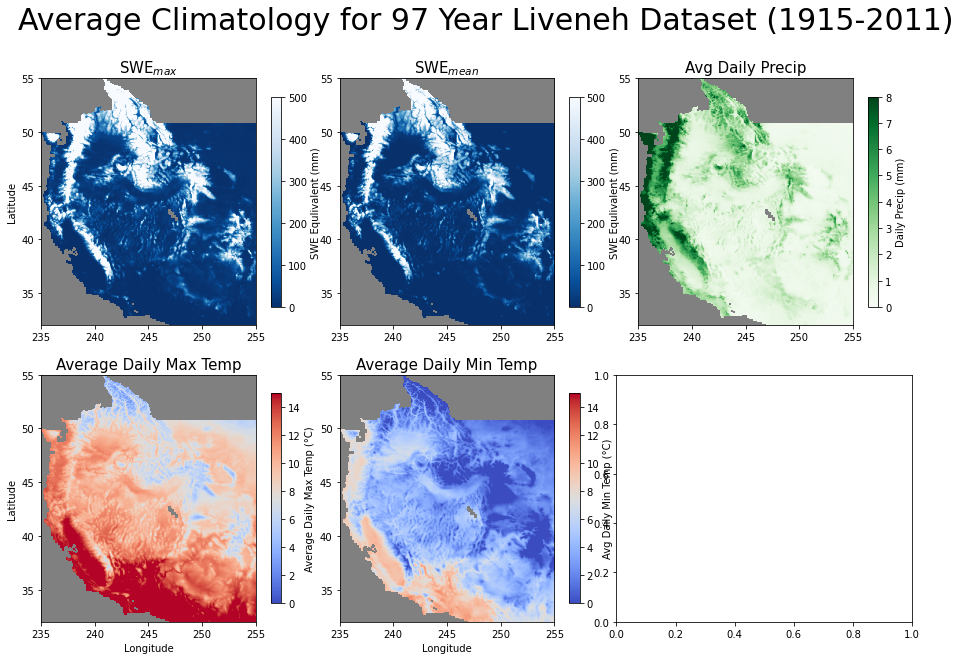

In [8]:
fig, ax = plt.subplots(2,3, figsize=(16,10))
fig.subplots_adjust(hspace=0.2, wspace=0.01)

ax = ax.ravel() # ravel for easy plotting

for i in range(5): # had trouble with colorbar but worked in loop ¯\_(ツ)_/¯
    axs = ax[i]
    if i in [0, 3]: # Add lat/lon only on outside edges
        axs.set_ylabel("Latitude")
    if i in [3,4,5]:
        axs.set_xlabel("Longitude")
    if i ==0: # plot max SWE
        fpath = os.path.join(rootdir, "climatology/mean_max_winter_swe.nc")
        winter_max = xr.open_dataset(fpath) # read and load dataset
        plot = axs.imshow(winter_max.swe.data[lat_lower:lat_upper, lon_lower:lon_upper], 
                    origin='lower', cmap=snow_cmap, aspect="equal", vmin=0, vmax=500,
                    extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))
        fig.colorbar(matplotlib.cm.ScalarMappable(cmap= snow_cmap, 
                         norm=matplotlib.colors.Normalize(vmin=0, vmax=500)),
                         label="SWE Equlivalent (mm)", ax=axs, shrink=0.85) # fancy colorbar
        axs.set_title(f'SWE$_{{max}}$', fontsize=15) # title

    if i == 1: # plot mean SWE
        fpath = os.path.join(rootdir, "climatology/mean_mean_winter_swe.nc")
        winter_mean = xr.open_dataset(fpath)
        plot = axs.imshow(winter_mean.swe.data[lat_lower:lat_upper, lon_lower:lon_upper], 
                    origin='lower', cmap=snow_cmap, aspect="equal", vmin=0, vmax=500,
                    extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))
        fig.colorbar(matplotlib.cm.ScalarMappable(cmap= snow_cmap, 
                         norm=matplotlib.colors.Normalize(vmin=0, vmax=500)),
                         label="SWE Equlivalent (mm)", ax=axs, shrink=0.85)
        axs.set_title(f'SWE$_{{mean}}$', fontsize=15)
    if i == 2: # plot precip
        vmin, vmax= 0,8
        fpath = os.path.join(rootdir, "climatology/mean_winter_prec.nc")
        winter_max = xr.open_dataset(fpath)
        plot = axs.imshow(winter_max.prec.data[lat_lower:lat_upper, lon_lower:lon_upper], 
                    origin='lower', cmap=rain_cmap, aspect="equal", vmin=vmin, vmax=vmax,
                    extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))
        fig.colorbar(matplotlib.cm.ScalarMappable(cmap= rain_cmap, 
                         norm=matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)),
                         label="Daily Precip (mm)", ax=axs, shrink=0.85)
        axs.set_title(f'Avg Daily Precip', fontsize=15) 
    if i == 3: # plot tmax 
        vmin, vmax= -15, 15
        fpath = os.path.join(rootdir, "climatology/mean_winter_tmax.nc")
        winter_tmax = xr.open_dataset(fpath)
        plot = axs.imshow(winter_tmax.tmax.data[lat_lower:lat_upper, lon_lower:lon_upper], 
                    origin='lower', cmap=temp_cmap, aspect="equal", vmin=vmin, vmax=vmax,
                    extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))
        fig.colorbar(matplotlib.cm.ScalarMappable(cmap= temp_cmap, 
                         norm=matplotlib.colors.Normalize(vmin=0, vmax=vmax)),
                         label="Average Daily Max Temp (°C)", ax=axs, shrink=0.85)
        axs.set_title(f'Average Daily Max Temp', fontsize=15)
    if i == 4: # plot tmin 
        vmin, vmax= -15, 15
        fpath = os.path.join(rootdir, "climatology/mean_winter_tmin.nc")
        winter_tmin = xr.open_dataset(fpath)
        plot = axs.imshow(winter_tmin.tmin.data[lat_lower:lat_upper, lon_lower:lon_upper], 
                    origin='lower', cmap=temp_cmap, aspect="equal", vmin=vmin, vmax=vmax,
                    extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))
        fig.colorbar(matplotlib.cm.ScalarMappable(cmap= temp_cmap, 
                         norm=matplotlib.colors.Normalize(vmin=0, vmax=vmax)),
                         label="Avg Daily Min Temp (°C)", ax=axs, shrink=0.85)
        axs.set_title(f'Average Daily Min Temp', fontsize=15)

plt.suptitle("Average Climatology for 97 Year Liveneh Dataset (1915-2011)", fontsize=30, 
             y=0.98, x=0.53);

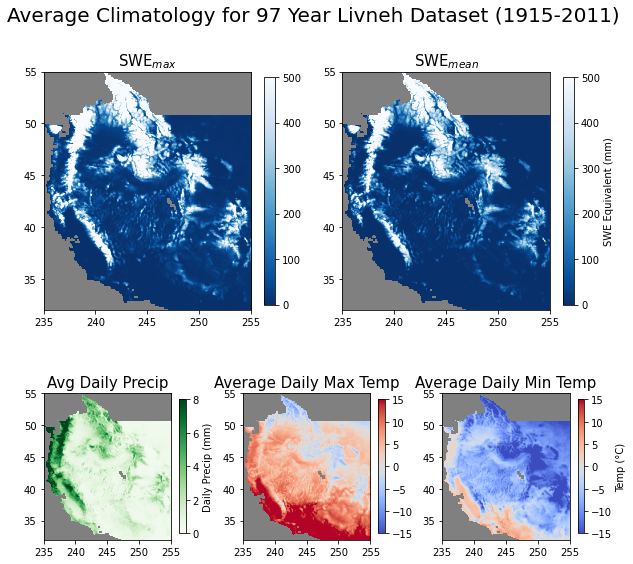

In [11]:
fig3 = plt.figure(constrained_layout=False, figsize=(10,10))
fig3.tight_layout()#subplots_adjust(hspace=0.1, wspace=0.1)
gs = fig3.add_gridspec(12,12,  wspace=4)

f3_ax1 = fig3.add_subplot(gs[0:6, 0:6])
fpath = os.path.join(rootdir, "climatology/mean_max_winter_swe.nc")
winter_max = xr.open_dataset(fpath) # read and load dataset
img = f3_ax1.imshow(winter_max.swe.data[lat_lower:lat_upper, lon_lower:lon_upper], 
            origin='lower', cmap=snow_cmap, aspect="equal", vmin=0, vmax=500,
            extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))
fig3.colorbar(img, shrink=0.85)#, matplotlib.cm.ScalarMappable(cmap= snow_cmap, 
#                  norm=matplotlib.colors.Normalize(vmin=0, vmax=500)),
#                  label="SWE Equlivalent (mm)", ax=axs, shrink=0.85) # fancy colorbar
f3_ax1.set_title(f'SWE$_{{max}}$', fontsize=15) # title

f3_ax2 = fig3.add_subplot(gs[0:6, 6:12])
fpath = os.path.join(rootdir, "climatology/mean_mean_winter_swe.nc")
winter_mean = xr.open_dataset(fpath) # read and load dataset
img = f3_ax2.imshow(winter_mean.swe.data[lat_lower:lat_upper, lon_lower:lon_upper], 
            origin='lower', cmap=snow_cmap, aspect="equal", vmin=0, vmax=500,
            extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))
fig3.colorbar(img, label = "SWE Equivalent (mm)", shrink=0.85)#, matplotlib.cm.ScalarMappable(cmap= snow_cmap, 
#                  norm=matplotlib.colors.Normalize(vmin=0, vmax=500)),
#                  label="SWE Equlivalent (mm)", ax=axs, shrink=0.85) # fancy colorbar
f3_ax2.set_title(f'SWE$_{{mean}}$', fontsize=15) # title

f3_ax3 = fig3.add_subplot(gs[6:12, 0:4])
vmin, vmax= 0,8
fpath = os.path.join(rootdir, "climatology/mean_winter_prec.nc")
winter_max = xr.open_dataset(fpath)
img = f3_ax3.imshow(winter_max.prec.data[lat_lower:lat_upper, lon_lower:lon_upper], 
            origin='lower', cmap=rain_cmap, aspect="equal", vmin=vmin, vmax=vmax,
            extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))
fig3.colorbar(img, label="Daily Precip (mm)", shrink=0.5)
f3_ax3.set_title(f'Avg Daily Precip', fontsize=15) 

f3_ax4 = fig3.add_subplot(gs[6:12, 4:8])
vmin, vmax= -15, 15
fpath = os.path.join(rootdir, "climatology/mean_winter_tmax.nc")
winter_tmax = xr.open_dataset(fpath)
img = f3_ax4.imshow(winter_tmax.tmax.data[lat_lower:lat_upper, lon_lower:lon_upper], 
            origin='lower', cmap=temp_cmap, aspect="equal", vmin=vmin, vmax=vmax,
            extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))
fig3.colorbar(img, shrink=0.5)
f3_ax4.set_title(f'Average Daily Max Temp', fontsize=15)
f3_ax5 = fig3.add_subplot(gs[6:12, 8:12])
vmin, vmax= -15, 15
fpath = os.path.join(rootdir, "climatology/mean_winter_tmin.nc")
winter_tmin = xr.open_dataset(fpath)
img = f3_ax5.imshow(winter_tmin.tmin.data[lat_lower:lat_upper, lon_lower:lon_upper], 
            origin='lower', cmap=temp_cmap, aspect="equal", vmin=vmin, vmax=vmax,
            extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))
fig3.colorbar(img, label="Temp (°C)", shrink=0.5)
f3_ax5.set_title(f'Average Daily Min Temp', fontsize=15);

fig3.suptitle("Average Climatology for 97 Year Livneh Dataset (1915-2011)", fontsize=20, 
             y=0.95, x=0.50);
fig3.savefig("/Users/julianschmitt/Documents/NOAA/plots/century_climatology_avg.png", dpi=300)

# We now look at seasonal timing
We begin by looking at the onset of winter. We (somewhat arbitrarily) define this as when there is first > 10 mm (~10 cm of snow). We also define a year season to start in the fall of the previous year. EG - winter 15-16 -> '16

/Users/julianschmitt/opt/anaconda3/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))


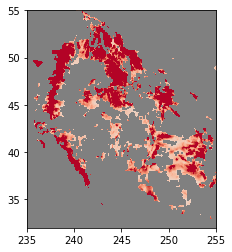

In [91]:
# based on a winter season (year) we select a slice to determine seasonal timing 
year = 2010
winter = xr.open_mfdataset("/Users/julianschmitt/Downloads/NOAA/liveneh_swe/*.nc")
onset = winter.sel(time=slice(f"{year-1}-10-01", f"{year}-3-31")).where(lambda x: x > 10).idxmax(dim='time')
plt.imshow(onset.swe[90][lat_lower:lat_upper, lon_lower:lon_upper], 
            origin='lower', cmap=temp_cmap, aspect="equal", vmin=-90, vmax=90,
            extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))

/Users/julianschmitt/opt/anaconda3/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/Users/julianschmitt/opt/anaconda3/lib/python3.8/site-packages/dask/array/reductions.py:901: RuntimeWarning: All-NaN slice encountered
  vals = func(x, axis=arg_axis, keepdims=True)


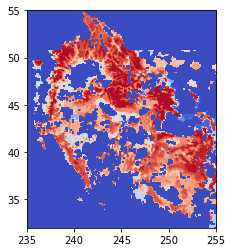

In [78]:
plt.imshow((onset.swe-np.datetime64(f"{year}-01-01")).astype('timedelta64[D]').astype(int)[lat_lower:lat_upper, lon_lower:lon_upper], 
            origin='lower', cmap=temp_cmap, aspect="equal", vmin=-90, vmax=90,
            extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))

In [60]:
tdate=np.array(onset.swe.data[lat_lower:lat_upper, lon_lower:lon_upper])[4][240:400][0] 

/Users/julianschmitt/opt/anaconda3/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/Users/julianschmitt/opt/anaconda3/lib/python3.8/site-packages/dask/array/reductions.py:901: RuntimeWarning: All-NaN slice encountered
  vals = func(x, axis=arg_axis, keepdims=True)


In [77]:
dates = pd.date_range('1950-01-01', '2017-12-31', freq='1d') # index your data
posi  = np.where((variable>10) & (dates.year==1950))         # find the date with SWE >10
np.min(dates[posi].dayofyear)                                # find the first day in a given year when SWE>10  

UFuncTypeError: ufunc 'subtract' cannot use operands with types dtype('float64') and dtype('<M8[D]')

In [134]:
def get_onset(year: int):
    onset = winter.sel(time=slice(f"{year-1}-10-01", f"{year}-3-31"))
    print(np.array(onset.lat))
    times = np.ndarray(shape=(onset.dims['lat'], onset.dims['lon']))
    for ilat, lat in enumerate(np.array(onset.lat)):
        for ilon, lon in enumerate(np.array(onset.lon)):
            index = np.where(np.array(onset.swe.data[:, ilat, ilon]) >10)
            if np.array(onset.swe.data[:, ilat, ilon])[0] ==np.nan:
                times[ilat, ilon] = np.datetime64(f"{year-1}-10-01") + np.timedelta64(240, 'D')
            else:
                try:
                    date = np.datetime64(f"{year-1}-10-01") + np.timedelta64(index[0][0], 'D')
                    times[ilat, ilon] = date
                except:
                    times[ilat, ilon] = np.nan
    return times
    
    #np.where(np.array(onset.swe.data[:, 200, 450]) >3)
get_onset(2010)

[25.15625 25.21875 25.28125 25.34375 25.40625 25.46875 25.53125 25.59375
 25.65625 25.71875 25.78125 25.84375 25.90625 25.96875 26.03125 26.09375
 26.15625 26.21875 26.28125 26.34375 26.40625 26.46875 26.53125 26.59375
 26.65625 26.71875 26.78125 26.84375 26.90625 26.96875 27.03125 27.09375
 27.15625 27.21875 27.28125 27.34375 27.40625 27.46875 27.53125 27.59375
 27.65625 27.71875 27.78125 27.84375 27.90625 27.96875 28.03125 28.09375
 28.15625 28.21875 28.28125 28.34375 28.40625 28.46875 28.53125 28.59375
 28.65625 28.71875 28.78125 28.84375 28.90625 28.96875 29.03125 29.09375
 29.15625 29.21875 29.28125 29.34375 29.40625 29.46875 29.53125 29.59375
 29.65625 29.71875 29.78125 29.84375 29.90625 29.96875 30.03125 30.09375
 30.15625 30.21875 30.28125 30.34375 30.40625 30.46875 30.53125 30.59375
 30.65625 30.71875 30.78125 30.84375 30.90625 30.96875 31.03125 31.09375
 31.15625 31.21875 31.28125 31.34375 31.40625 31.46875 31.53125 31.59375
 31.65625 31.71875 31.78125 31.84375 31.90625 31.96

<ipython-input-134-dc7ded151284>:7: RuntimeWarning: invalid value encountered in greater
  index = np.where(np.array(onset.swe.data[:, ilat, ilon]) >10)
<ipython-input-134-dc7ded151284>:7: RuntimeWarning: invalid value encountered in greater
  index = np.where(np.array(onset.swe.data[:, ilat, ilon]) >10)
<ipython-input-134-dc7ded151284>:7: RuntimeWarning: invalid value encountered in greater
  index = np.where(np.array(onset.swe.data[:, ilat, ilon]) >10)
<ipython-input-134-dc7ded151284>:7: RuntimeWarning: invalid value encountered in greater
  index = np.where(np.array(onset.swe.data[:, ilat, ilon]) >10)
<ipython-input-134-dc7ded151284>:7: RuntimeWarning: invalid value encountered in greater
  index = np.where(np.array(onset.swe.data[:, ilat, ilon]) >10)
<ipython-input-134-dc7ded151284>:7: RuntimeWarning: invalid value encountered in greater
  index = np.where(np.array(onset.swe.data[:, ilat, ilon]) >10)
<ipython-input-134-dc7ded151284>:7: RuntimeWarning: invalid value encountered in g

<ipython-input-134-dc7ded151284>:7: RuntimeWarning: invalid value encountered in greater
  index = np.where(np.array(onset.swe.data[:, ilat, ilon]) >10)
<ipython-input-134-dc7ded151284>:7: RuntimeWarning: invalid value encountered in greater
  index = np.where(np.array(onset.swe.data[:, ilat, ilon]) >10)
<ipython-input-134-dc7ded151284>:7: RuntimeWarning: invalid value encountered in greater
  index = np.where(np.array(onset.swe.data[:, ilat, ilon]) >10)
<ipython-input-134-dc7ded151284>:7: RuntimeWarning: invalid value encountered in greater
  index = np.where(np.array(onset.swe.data[:, ilat, ilon]) >10)
<ipython-input-134-dc7ded151284>:7: RuntimeWarning: invalid value encountered in greater
  index = np.where(np.array(onset.swe.data[:, ilat, ilon]) >10)
<ipython-input-134-dc7ded151284>:7: RuntimeWarning: invalid value encountered in greater
  index = np.where(np.array(onset.swe.data[:, ilat, ilon]) >10)
<ipython-input-134-dc7ded151284>:7: RuntimeWarning: invalid value encountered in g

KeyboardInterrupt: 

In [129]:
#(tdate-np.datetime64(f"{year}-01-01")).astype('timedelta64[D]').astype(int)
np.ndarray(shape=(4,5), dtype=int)
np.where(np.array(onset.swe.data[:, 1, 1]) >10)
np.array(onset.swe.data[:, 1, 1])

<ipython-input-129-c8f717b23166>:3: RuntimeWarning: invalid value encountered in greater
  np.where(np.array(onset.swe.data[:, 1, 1]) >10)


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [123]:
np.datetime64(f"{year-1}-10-01") + np.timedelta64(90)

numpy.datetime64('2009-12-30')

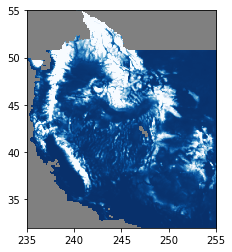

In [85]:

plt.imshow(swe_clim_max.swe[lat_lower:lat_upper, lon_lower:lon_upper], 
                        origin='lower', cmap=snow_cmap, aspect="equal", vmin=0, vmax=500,
                        extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))